<a href="https://colab.research.google.com/github/Nand0000000000/CNNs/blob/main/Av1_Tom%26Jerry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d balabaskar/tom-and-jerry-image-classification
!unzip -q tom-and-jerry-image-classification.zip -d tom_and_jerry


Dataset URL: https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification
License(s): CC0-1.0


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil

base_dir = "tom_and_jerry/tom_and_jerry/tom_and_jerry"
classes = ["tom", "jerry", "tom_jerry_1", "tom_jerry_0"]

structured_dir = "structured_data"
for split in ["train", "val", "test"]:
    for cls in classes:
        os.makedirs(os.path.join(structured_dir, split, cls), exist_ok=True)

for cls in classes:
    images = os.listdir(os.path.join(base_dir, cls))
    train, temp = train_test_split(images, test_size=0.3, random_state=42)
    val, test = train_test_split(temp, test_size=0.5, random_state=42)

    for img in train:
        shutil.copy(os.path.join(base_dir, cls, img), os.path.join(structured_dir, "train", cls, img))
    for img in val:
        shutil.copy(os.path.join(base_dir, cls, img), os.path.join(structured_dir, "val", cls, img))
    for img in test:
        shutil.copy(os.path.join(base_dir, cls, img), os.path.join(structured_dir, "test", cls, img))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory("structured_data/train", image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory("structured_data/val", image_size=(img_height, img_width), batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory("structured_data/test", image_size=(img_height, img_width), batch_size=batch_size)

normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

class_names = test_ds.class_names

test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


Found 3834 files belonging to 4 classes.
Found 821 files belonging to 4 classes.
Found 823 files belonging to 4 classes.


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=15)


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 22s 143ms/step - accuracy: 0.3512 - loss: 1.3534 - val_accuracy: 0.5238 - val_loss: 1.1726
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.5535 - loss: 1.0542 - val_accuracy: 0.6382 - val_loss: 0.8970
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.6716 - loss: 0.8018 - val_accuracy: 0.7235 - val_loss: 0.6917
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.7494 - loss: 0.6409 - val_accuracy: 0.7588 - val_loss: 0.6259
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.8192 - loss: 0.4799 - val_accuracy: 0.7625 - val_loss: 0.6425
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 100ms/step - accuracy: 0.8565 - loss: 0.3747 - val_accuracy: 0.7856 - val_loss: 0.5989
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.8803 - loss: 0.3047 - val_accuracy: 0.7832 - val_loss: 0.6601
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.9000 - loss: 0.2684 - val_ac

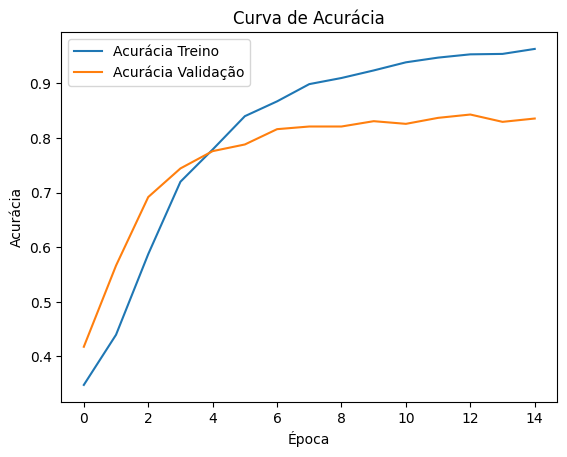

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.title("Curva de Acurácia")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
          

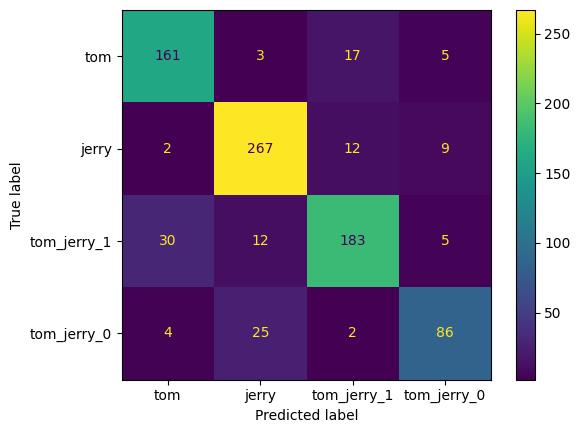

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=classes))
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes).plot()


In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

transfer_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

pre_trained_model =transfer_model.fit(train_ds, validation_data=val_ds, epochs=10)


<ipython-input-13-db57d74ed8d3>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 26s 139ms/step - accuracy: 0.4159 - loss: 1.3777 - val_accuracy: 0.5847 - val_loss: 0.9917
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.5962 - loss: 0.9777 - val_accuracy: 0.6346 - val_loss: 0.9091
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.6432 - loss: 0.8738 - val_accuracy: 0.6736 - val_loss: 0.8122
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.6839 - loss: 0.7690 - val_accuracy: 0.6955 - val_loss: 0.7727
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.7196 - loss: 0.6938 - val_accuracy: 0.7174 - val_loss: 0.7237
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 91ms/step - accuracy: 0.7555 - loss: 0.6048 - val_accuracy: 0.7418 - val_loss: 0.6868
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.7639 - loss: 0.5820 - val_accuracy: 0.7430 - val_loss: 0.6636
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.7896 - loss: 0.5370 -

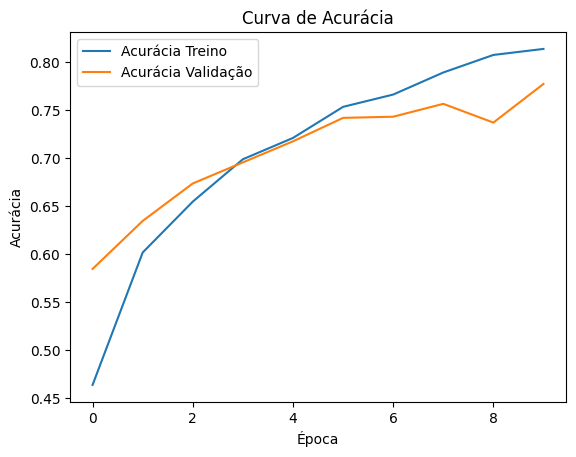

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pre_trained_model.history['accuracy'], label='Acurácia Treino')
plt.plot(pre_trained_model.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.title("Curva de Acurácia")
plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


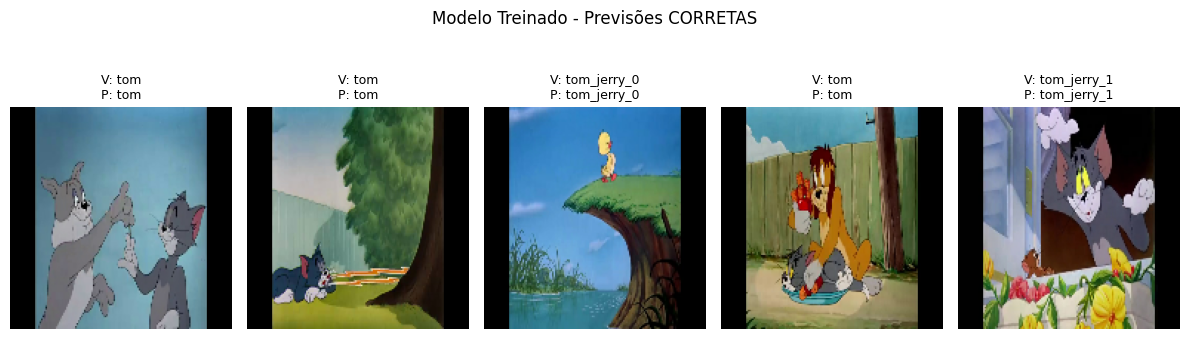

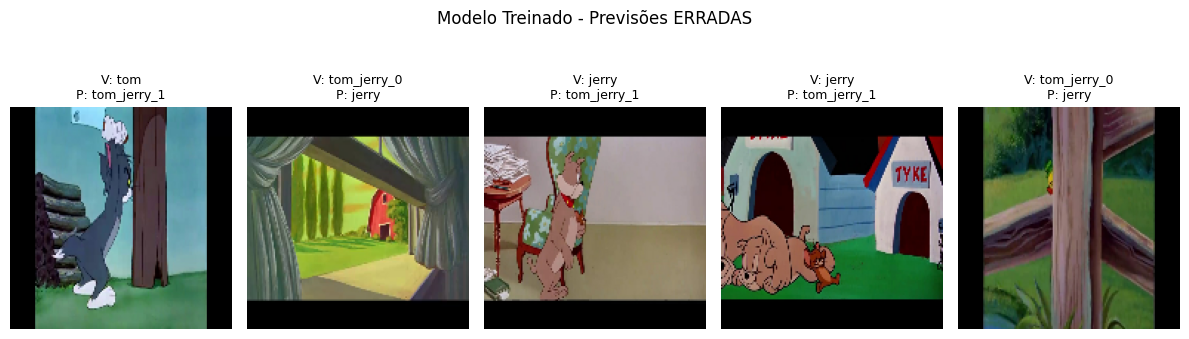

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 178ms/step


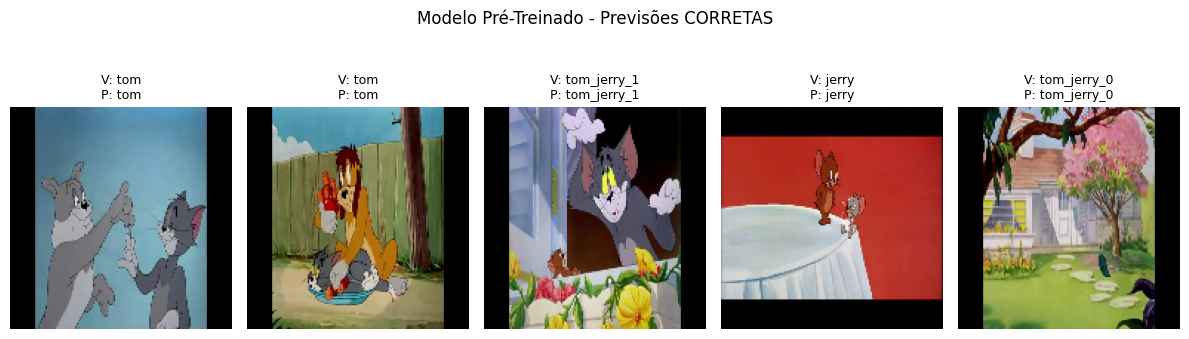

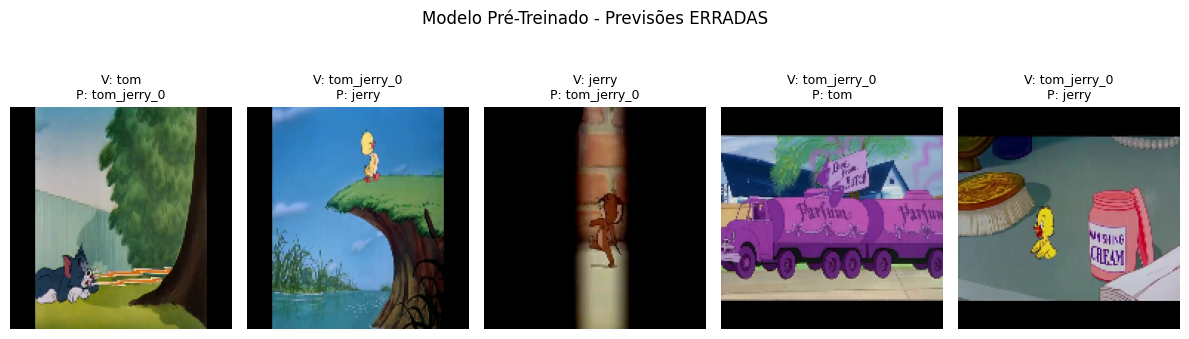

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def get_images_and_labels(dataset):
    images, labels = [], []
    for batch_images, batch_labels in dataset:
        images.append(batch_images.numpy())
        labels.append(batch_labels.numpy())
    return np.concatenate(images), np.concatenate(labels)

x_test, y_test = get_images_and_labels(test_ds)

def show_predictions(model, x, y, title_prefix='Modelo'):
    preds = model.predict(x)
    pred_labels = np.argmax(preds, axis=1)

    correct_idxs = np.where(pred_labels == y)[0]
    wrong_idxs = np.where(pred_labels != y)[0]

    def plot_samples(indices, title):
        plt.figure(figsize=(12, 4))
        for i, idx in enumerate(indices[:5]):
            plt.subplot(1, 5, i+1)
            plt.imshow(x[idx])
            true_label = class_names[y[idx]]
            pred_label = class_names[pred_labels[idx]]
            plt.title(f"V: {true_label}\nP: {pred_label}", fontsize=9)
            plt.axis("off")
        plt.suptitle(title)
        plt.tight_layout()
        plt.show()

    plot_samples(correct_idxs, f"{title_prefix} - Previsões CORRETAS")
    plot_samples(wrong_idxs, f"{title_prefix} - Previsões ERRADAS")

show_predictions(model, x_test, y_test, title_prefix="Modelo Treinado")

show_predictions(transfer_model, x_test, y_test, title_prefix="Modelo Pré-Treinado")

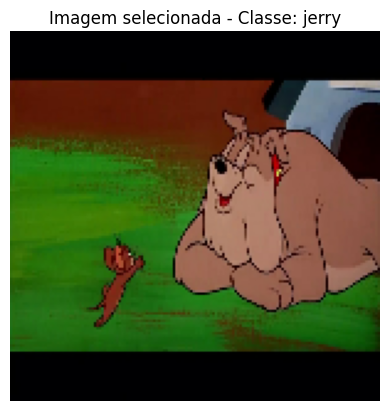

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


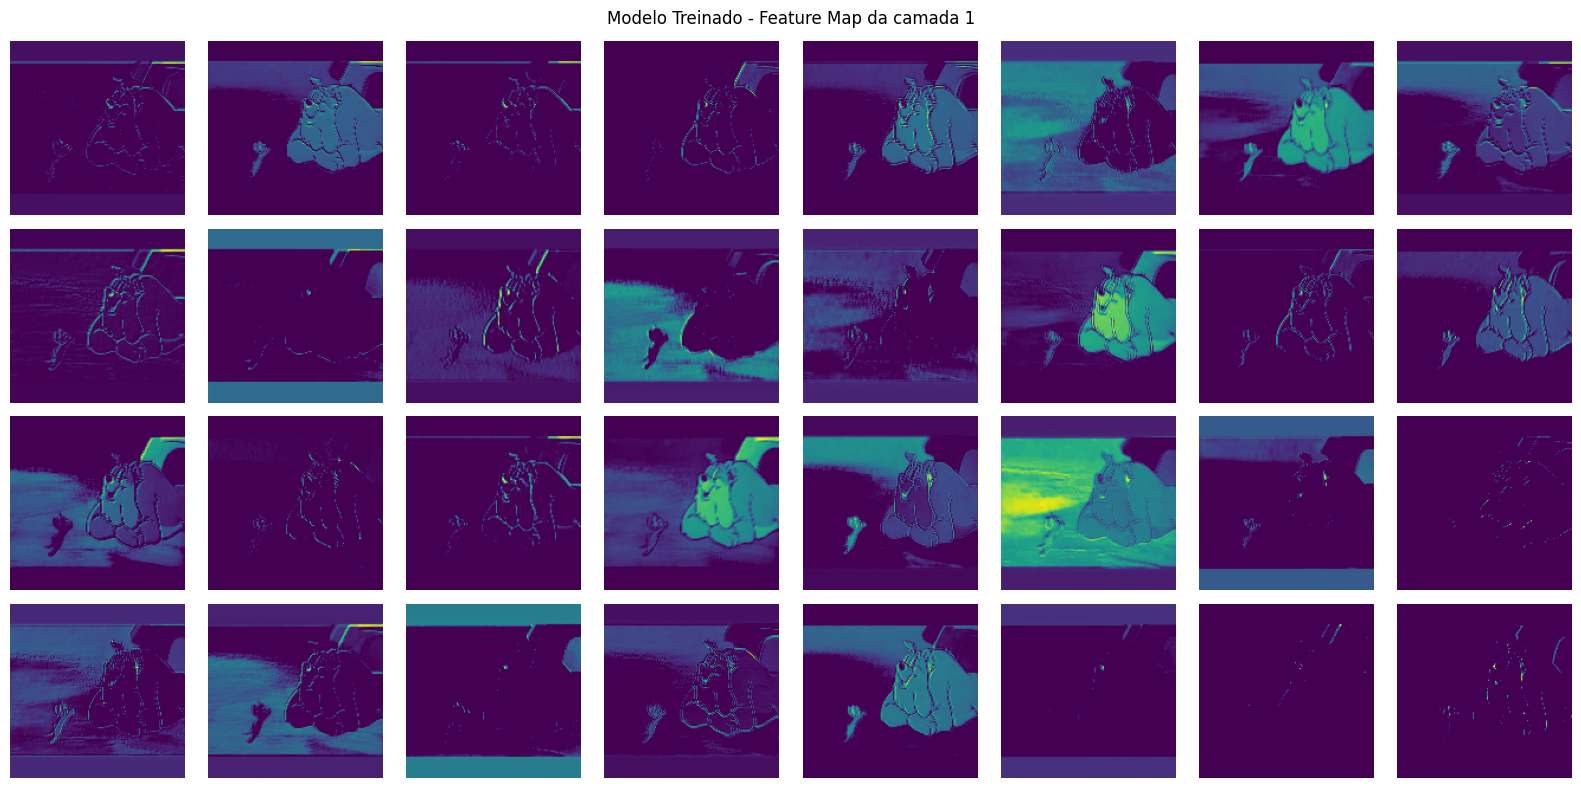

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


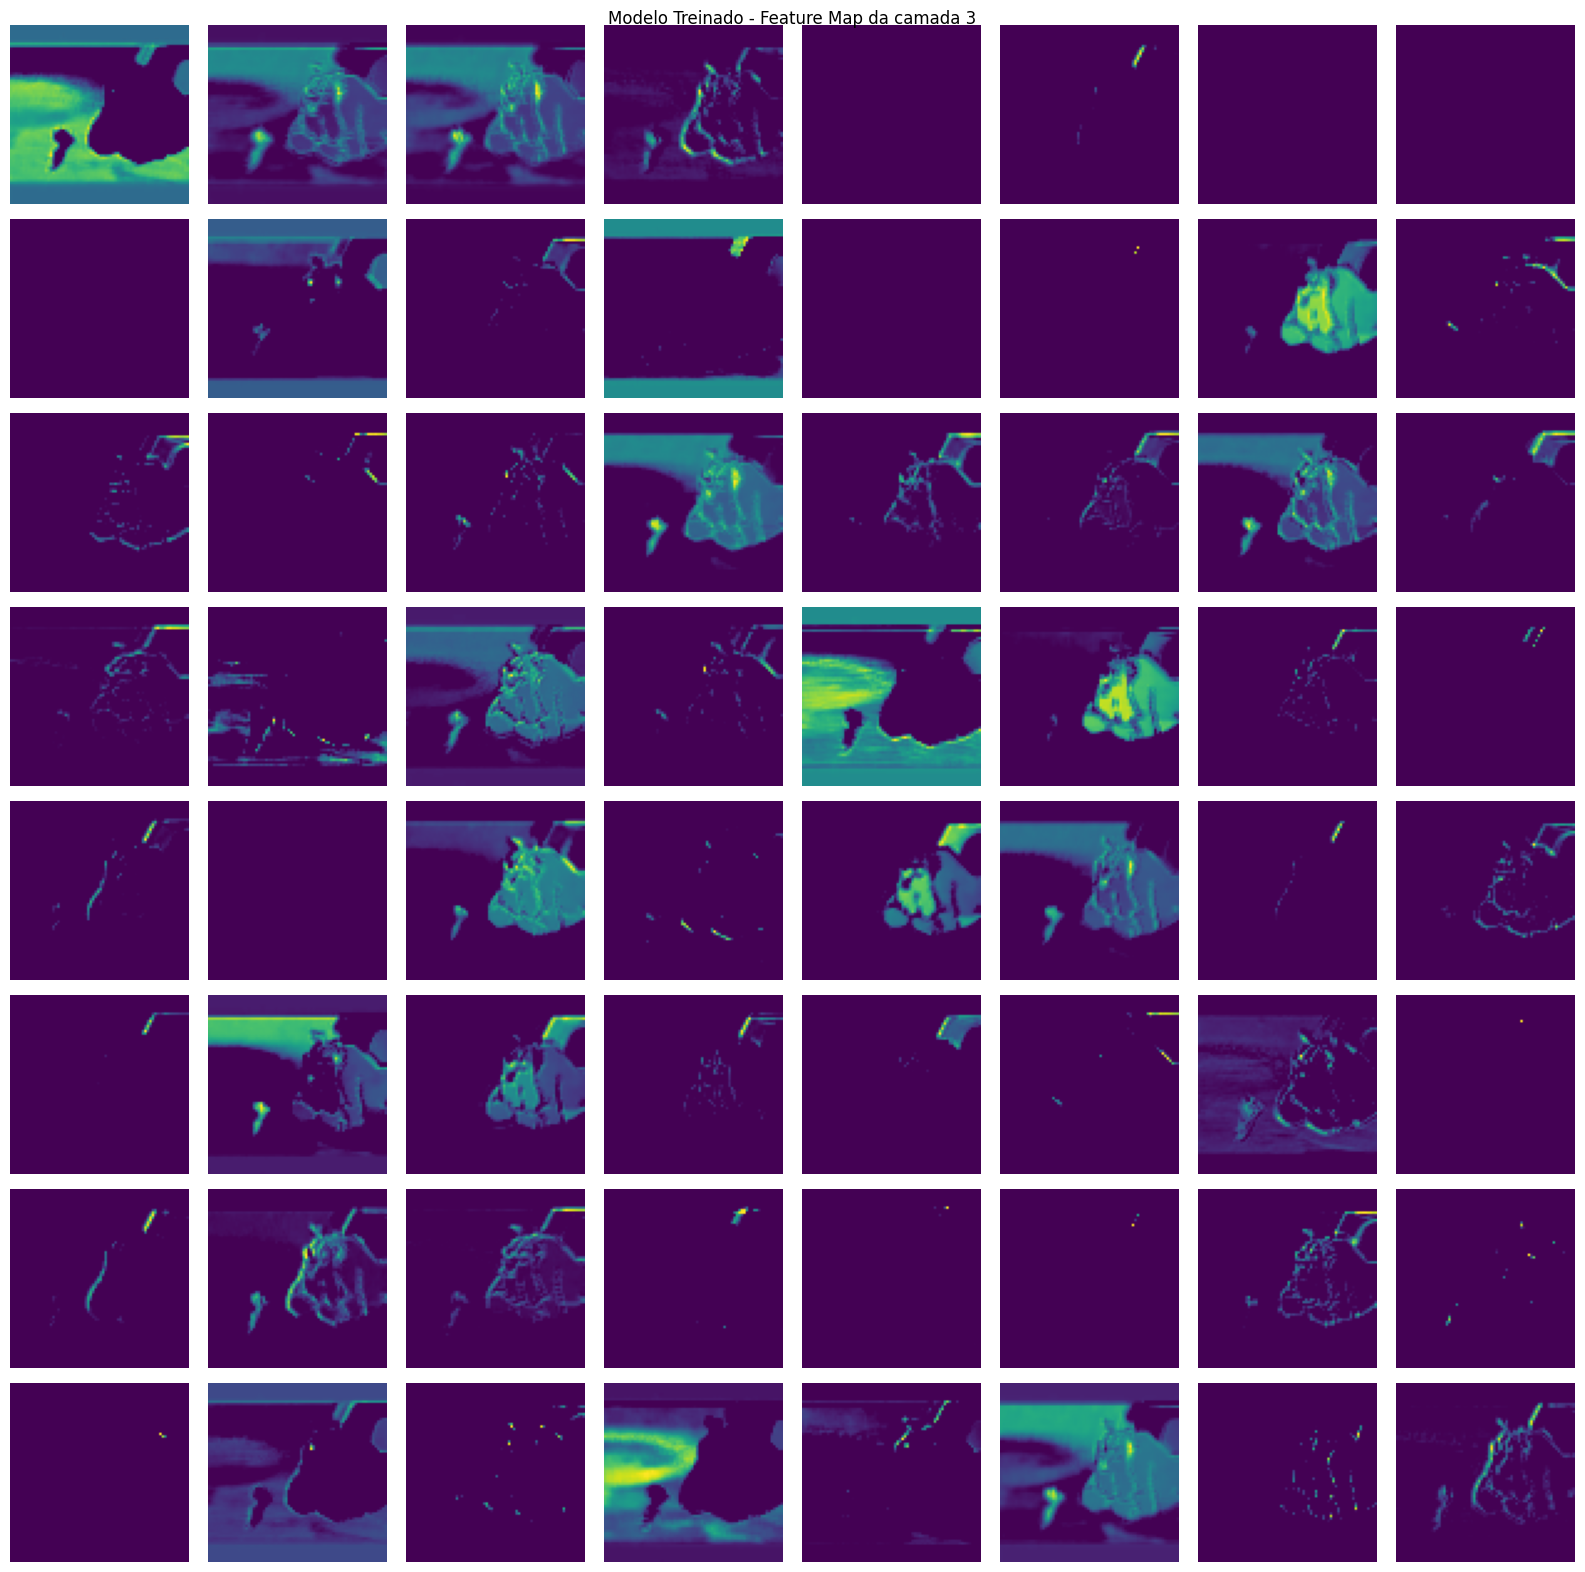

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

for images, labels in test_ds.take(1):
    image = images[0]
    label = labels[0]

plt.imshow(image)
plt.title(f"Imagem selecionada - Classe: {class_names[label]}")
plt.axis("off")
plt.show()

def plot_feature_maps_sequential(model, image, title_prefix="Modelo", num_layers=2):
    image_batch = image[tf.newaxis, ...]

    for i, layer in enumerate(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            feature_model = tf.keras.Sequential(model.layers[:i+1])
            activations = feature_model.predict(image_batch)

            num_filters = activations.shape[-1]
            cols = min(8, num_filters)
            rows = (num_filters + cols - 1) // cols
            plt.figure(figsize=(cols * 2, rows * 2))
            for j in range(min(num_filters, cols * rows)):
                plt.subplot(rows, cols, j + 1)
                plt.imshow(activations[0, :, :, j], cmap='viridis')
                plt.axis("off")
            plt.suptitle(f"{title_prefix} - Feature Map da camada {i + 1}")
            plt.tight_layout()
            plt.show()

            num_layers -= 1
            if num_layers == 0:
                break

plot_feature_maps_sequential(model, image, title_prefix="Modelo Treinado")

In [ ]:
!pip install keras-tuner -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Choice('filters', [32, 64, 128]),
        kernel_size=(3,3), activation='relu', input_shape=(150,150,3)))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Conv2D(
        filters=hp.Choice('filters_2', [64, 128]),
        kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('units', 64, 256, step=64), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', 0.2, 0.5, step=0.1)))
    model.add(layers.Dense(4, activation='softmax'))

    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop']),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='keras_tuner_dir',
    project_name='tom_jerry_tuning')

tuner.search(train_ds, validation_data=val_ds, epochs=10)
tuner.results_summary()


Trial 5 Complete [00h 02m 02s]
val_accuracy: 0.6918392181396484

Best val_accuracy So Far: 0.7795371413230896
Total elapsed time: 00h 13m 23s
Results summary
Results in keras_tuner_dir/tom_jerry_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
filters: 128
filters_2: 64
units: 128
dropout: 0.4
optimizer: rmsprop
Score: 0.7795371413230896

Trial 4 summary
Hyperparameters:
filters: 64
filters_2: 64
units: 128
dropout: 0.30000000000000004
optimizer: sgd
Score: 0.6918392181396484

Trial 3 summary
Hyperparameters:
filters: 128
filters_2: 64
units: 64
dropout: 0.30000000000000004
optimizer: sgd
Score: 0.6613885760307312

Trial 0 summary
Hyperparameters:
filters: 32
filters_2: 128
units: 192
dropout: 0.4
optimizer: sgd
Score: 0.6540803909301758

Trial 2 summary
Hyperparameters:
filters: 128
filters_2: 128
units: 64
dropout: 0.2
optimizer: sgd
Score: 0.6504263281822205


A técnica escolhida para busca de hiperparâmetros foi a Otimização Bayesiana, implementada com o KerasTuner. Essa abordagem se mostrou adequada por ser mais eficiente do que métodos como Grid Search ou Random Search, já que utiliza os resultados anteriores para explorar as combinações mais promissoras de hiperparâmetros, reduzindo o número de tentativas necessárias para encontrar boas configurações.

Durante os testes, foram avaliadas diferentes quantidades de filtros nas camadas convolucionais, tamanhos da camada densa, taxas de dropout e otimizadores (SGD, RMSprop e Adam). A melhor configuração obtida foi com 128 filtros na primeira camada convolucional, 64 na segunda, 128 unidades na camada densa, dropout de 0.4 e otimizador RMSprop, atingindo uma acurácia de validação de aproximadamente 77,95%.

Esse resultado sugere que modelos mais profundos com maior capacidade de extração de características e otimizadores mais adaptativos, como o RMSprop, são mais eficazes nesse conjunto de dados. Por outro lado, modelos com otimizador SGD apresentaram desempenho inferior em todos os testes realizados, o que reforça a escolha final.

A utilização da Otimização Bayesiana permitiu alcançar bons resultados em pouco tempo de execução e com poucas iterações, comprovando sua eficácia na seleção automática de hiperparâmetros.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

vgg_base = VGG16(input_shape=(img_height, img_width, 3), include_top=False, weights='imagenet')
vgg_base.trainable = False

vgg_model = Sequential([
    vgg_base,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

vgg_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

vgg_history = vgg_model.fit(train_ds, validation_data=val_ds, epochs=10)

vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_ds)
print(f"Test accuracy with VGG16: {vgg_test_acc}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 37s 214ms/step - accuracy: 0.3759 - loss: 1.3648 - val_accuracy: 0.5116 - val_loss: 1.1484
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 118ms/step - accuracy: 0.5016 - loss: 1.1365 - val_accuracy: 0.5579 - val_loss: 1.0625
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - accuracy: 0.5435 - loss: 1.0687 - val_accuracy: 0.5761 - val_loss: 1.0079
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 119ms/step - accuracy: 0.5808 - loss: 1.0043 - val_accuracy: 0.5920 - val_loss: 0.9615
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.6005 - loss: 0.9598 - val_accuracy: 0.6200 - val_loss: 0.9211
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.6375 - loss: 0.9054 - val_accuracy: 0.6443 - val_loss: 0.9028
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.6597 - loss: 0.8627 - val_accuracy: 0.6504 - val_loss: 0.8748
Epoch 8/10
120/120 ━━━━━━━━━━━━━

# 🐭 Tom & Jerry - Classificação de Imagens com CNN

Este projeto usa redes neurais convolucionais (CNNs) para classificar imagens dos personagens Tom e Jerry em quatro categorias: `tom`, `jerry`, `tom_jerry_0` e `tom_jerry_1`.

---

##  Como Rodar

1. **Ative a GPU no Colab:**
   - Vá em **Ambiente de execução > Alterar tipo de ambiente de execução > GPU**

2. **Execute o notebook célula por célula:**
   - As dependências serão instaladas automaticamente
   - O dataset será baixado do Kaggle
   - O modelo será treinado e avaliado
   - Os resultados (gráficos e métricas) serão exibidos ao final

---

##  Como obter a chave da API do Kaggle

Para baixar o dataset diretamente do Kaggle no Colab, é necessário autenticar com a API:

1. Acesse seu perfil em: [https://www.kaggle.com/account](https://www.kaggle.com/account)
2. Vá até a seção **"API"**
3. Clique em **"Create New API Token"**
4. Será baixado um arquivo chamado `kaggle.json`
5. No Colab, siga as instruções do notebook para fazer upload desse arquivo

---

##  O que o notebook faz

- Carrega e organiza o dataset
- Cria e treina uma CNN do zero
- Apresenta os resultados com gráficos
- Compara com modelos pré-treinados (MobileNetV2)
- Analisa erros de classificação

---
